# Pandas for Data Analysis


![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)

Pandas is a library written on top of Numpy designed to make data analysis fast and easy in Python. It is also intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Is a Python package that provides fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive.

Chapter based on the book [Python for Data Analysis by William Wes-ley McKinney (O’Reilly). Copyright 2012 William McKinney, 978-1-449-31979-3"](https://www.oreilly.com/library/view/python-for-data/9781449323592/)

In [2]:
import pandas as pd

from pandas import Series, DataFrame
import pandas as pd
import numpy as np


# Data Structures

## Series


The base pandas abstraction. You can think of it as the love child of a numpy array and a dictionary.

It a one-dimensional arraly-like object containing an array of data and an associated array of data labels.

In [153]:
obj = Series([4, 5, 6, -1])
obj

0    4
1    5
2    6
3   -1
dtype: int64

In [154]:
obj.values

array([ 4,  5,  6, -1], dtype=int64)

In [155]:
pd.Series([8, 7, 9, 0])

0    8
1    7
2    9
3    0
dtype: int64

If we provide an index, pandas will use it. If not, it will automatically create one.

In [156]:
obj2 = Series([4, 5, 6, -1], index = ['d', 'b', 'a', 'c'])
obj2

d    4
b    5
a    6
c   -1
dtype: int64

In [157]:
s = pd.Series([8, 7, 9, 0], index=list('abcd'))
s

a    8
b    7
c    9
d    0
dtype: int64

In [158]:
s.index, s.values

(Index(['a', 'b', 'c', 'd'], dtype='object'), array([8, 7, 9, 0], dtype=int64))

In [159]:
obj2['a']

6

In [160]:
s[['a','b','c']]

a    8
b    7
c    9
dtype: int64

In [161]:
obj2[obj2 > 0], np.exp(obj2)

(d    4
 b    5
 a    6
 dtype: int64,
 d     54.598150
 b    148.413159
 a    403.428793
 c      0.367879
 dtype: float64)

Series is also a fixed-length, ordered dict, mapping on index values to data values.

In [162]:
'c' in obj2

True

In [163]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [164]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index = states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

```NaN``` means "Not a Number", pandas considers missing or NA (Not Available) values

In [165]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [166]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series object and its index have a `name` attribute

In [167]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [168]:
np.cumsum(obj4)

state
California         NaN
Ohio           35000.0
Oregon         51000.0
Texas         122000.0
Name: population, dtype: float64

We can create Series from dictionaries:

In [169]:
s2 = pd.Series({'a' : 7, 'b' : 2, 'c' : 5})
s2

a    7
b    2
c    5
dtype: int64

And here is where the magic happens: numpy arrays only identify their contents by position. In contrast, __pandas knows their "name" and will align them based on their indexes__

In [170]:
s + s2

a    15.0
b     9.0
c    14.0
d     NaN
dtype: float64

In [171]:
s * 2.3

a    18.4
b    16.1
c    20.7
d     0.0
dtype: float64

In [172]:
s % 2

a    0
b    1
c    1
d    0
dtype: int64

In [173]:
s % 2 == 0

a     True
b    False
c    False
d     True
dtype: bool

In [174]:
s[s % 2 == 0] 

a    8
d    0
dtype: int64

## DataFrame

This is the object you'll work most of the time with. It represents a table of _m_ observations x _n_ variables. Each variable, or column, is a Series. 

It represents a tabular, spreadsheet-like data structure containing an ordered collection of columns (wheter it is numeric, string, boolean, etc.).

It could be also thought as a dict of Series



In [175]:
dfdata = {
    'province' : ['M', 'M', 'M', 'B', 'B'],
    'population': [1.5e6, 2e6, 3e6, 5e5, 1.5e6],
    'year' : [1900, 1950, 2000, 1900, 2000]   
}

df = pd.DataFrame(dfdata)
df

,province,population,year
0,M,1500000.0,1900
1,M,2000000.0,1950
2,M,3000000.0,2000
3,B,500000.0,1900
4,B,1500000.0,2000


In [176]:
df2 = pd.DataFrame(dfdata, columns = ['population', 'province', 'year', 'debt'])
df2

,population,province,year,debt
0,1500000.0,M,1900,NaN
1,2000000.0,M,1950,NaN
2,3000000.0,M,2000,NaN
3,500000.0,B,1900,NaN
4,1500000.0,B,2000,NaN


In [177]:
df2 = pd.DataFrame(dfdata, columns = ['population', 'province', 'year', 'debt'],
                  index = ['one', 'two', 'three', 'four', 'five'])
df2

,population,province,year,debt
one,1500000.0,M,1900,NaN
two,2000000.0,M,1950,NaN
three,3000000.0,M,2000,NaN
four,500000.0,B,1900,NaN
five,1500000.0,B,2000,NaN


A column can be retrieved as a Series either by dict-like notation or by attribute

In [178]:
df['province']

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

In [179]:
df.province

0    M
1    M
2    M
3    B
4    B
Name: province, dtype: object

Rows can be retrieved with `loc`

In [180]:
df2.loc['two']

population    2e+06
province          M
year           1950
debt            NaN
Name: two, dtype: object

In [181]:
df['2nd_language'] = np.nan
df['2nd_language']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 2nd_language, dtype: float64

In [182]:
df.count()

province        5
population      5
year            5
2nd_language    0
dtype: int64

In [183]:
df2['debt'] = 22
df2.debt

one      22
two      22
three    22
four     22
five     22
Name: debt, dtype: int64

In [184]:
df2.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [185]:
df

,province,population,year,2nd_language
0,M,1500000.0,1900,NaN
1,M,2000000.0,1950,NaN
2,M,3000000.0,2000,NaN
3,B,500000.0,1900,NaN
4,B,1500000.0,2000,NaN


In [186]:
df.index = list('abcde')
df

,province,population,year,2nd_language
a,M,1500000.0,1900,NaN
b,M,2000000.0,1950,NaN
c,M,3000000.0,2000,NaN
d,B,500000.0,1900,NaN
e,B,1500000.0,2000,NaN


In [187]:
df[2] = 'holi'
df

,province,population,year,2nd_language,2
a,M,1500000.0,1900,NaN,holi
b,M,2000000.0,1950,NaN,holi
c,M,3000000.0,2000,NaN,holi
d,B,500000.0,1900,NaN,holi
e,B,1500000.0,2000,NaN,holi


In [188]:
2 == '2'

False

In [189]:
df['Capital'] = df.province == 'M'
df

,province,population,year,2nd_language,2,Capital
a,M,1500000.0,1900,NaN,holi,True
b,M,2000000.0,1950,NaN,holi,True
c,M,3000000.0,2000,NaN,holi,True
d,B,500000.0,1900,NaN,holi,False
e,B,1500000.0,2000,NaN,holi,False


In [190]:
del df['Capital']
df

,province,population,year,2nd_language,2
a,M,1500000.0,1900,NaN,holi
b,M,2000000.0,1950,NaN,holi
c,M,3000000.0,2000,NaN,holi
d,B,500000.0,1900,NaN,holi
e,B,1500000.0,2000,NaN,holi


In [191]:
df.loc['d']

province             B
population      500000
year              1900
2nd_language       NaN
2                 holi
Name: d, dtype: object

In [192]:
df.iloc[3]

province             B
population      500000
year              1900
2nd_language       NaN
2                 holi
Name: d, dtype: object

In [193]:
df[0:2]

,province,population,year,2nd_language,2
a,M,1500000.0,1900,NaN,holi
b,M,2000000.0,1950,NaN,holi


In [194]:
df.iloc[0:2]

,province,population,year,2nd_language,2
a,M,1500000.0,1900,NaN,holi
b,M,2000000.0,1950,NaN,holi


In [195]:
df.T

,a,b,c,d,e
province,M,M,M,B,B
population,1.5e+06,2e+06,3e+06,500000,1.5e+06
year,1900,1950,2000,1900,2000
2nd_language,NaN,NaN,NaN,NaN,NaN
2,holi,holi,holi,holi,holi


In [196]:
df['population'][2] = np.nan

<ipython-input-196-25af9dbc60bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'][2] = np.nan


In [197]:
df.dtypes

province         object
population      float64
year              int64
2nd_language    float64
2                object
dtype: object

In [198]:
type(np.nan)

float

In [199]:
df.describe()

,population,year,2nd_language
count,4.000000e+00,5.0,0.0
mean,1.375000e+06,1950.0,NaN
std,6.291529e+05,50.0,NaN
min,5.000000e+05,1900.0,NaN
25%,1.250000e+06,1900.0,NaN
50%,1.500000e+06,1950.0,NaN
75%,1.625000e+06,2000.0,NaN
max,2.000000e+06,2000.0,NaN


In [200]:
df['something'] = 'somewhat'
df

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


The column returned when indexing a DataFrame is a view on the underlying data, not a copy. It can be copied with `copy` method

In [201]:
df.values

array([['M', 1500000.0, 1900, nan, 'holi', 'somewhat'],
       ['M', 2000000.0, 1950, nan, 'holi', 'somewhat'],
       ['M', nan, 2000, nan, 'holi', 'somewhat'],
       ['B', 500000.0, 1900, nan, 'holi', 'somewhat'],
       ['B', 1500000.0, 2000, nan, 'holi', 'somewhat']], dtype=object)

In [202]:
df2.values

array([[1500000.0, 'M', 1900, 22],
       [2000000.0, 'M', 1950, 22],
       [3000000.0, 'M', 2000, 22],
       [500000.0, 'B', 1900, 22],
       [1500000.0, 'B', 2000, 22]], dtype=object)

## Index objects



Responsible for holding the axis labels and names. Any array or sequence is internally converted to an Index. 



In [203]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [204]:
df.columns

Index(['province', 'population', 'year', '2nd_language', 2, 'something'], dtype='object')

In [205]:
df.index[2]

'c'

In [206]:
df.index[2:]

Index(['c', 'd', 'e'], dtype='object')

__Index objects are immutable__

This is important so that index object can be safely shared among data structures

In [207]:
index = pd.Index(np.arange(3))

obj2

d    4
b    5
a    6
c   -1
dtype: int64

In [208]:
obj2 = Series([4.5, -0.5, 0], index = index)
obj2.index is index

True

# Functionality

## Dropping entries from an axis

In [209]:
s2 = pd.Series(np.random.randn(6), index = list('poiueh'))
s2

p    0.793074
o    0.121852
i    0.611618
u   -2.198316
e    0.286094
h    1.434151
dtype: float64

In [210]:
s2.drop(['p', 'e'])

o    0.121852
i    0.611618
u   -2.198316
h    1.434151
dtype: float64

By default, `drop()` doesn't modify the original Series- it creates a copy. We can change that with the argument `inplace`.

In [211]:
s2

p    0.793074
o    0.121852
i    0.611618
u   -2.198316
e    0.286094
h    1.434151
dtype: float64

In [212]:
s2.drop(['i'], inplace=True)

In [213]:
s2

p    0.793074
o    0.121852
u   -2.198316
e    0.286094
h    1.434151
dtype: float64

In [214]:
df.drop('c')

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


In [215]:
df.drop('2nd_language', axis=1)

,province,population,year,2,something
a,M,1500000.0,1900,holi,somewhat
b,M,2000000.0,1950,holi,somewhat
c,M,NaN,2000,holi,somewhat
d,B,500000.0,1900,holi,somewhat
e,B,1500000.0,2000,holi,somewhat


## Indexing, selection, and filtering
 

The key here is that we can build boolean Series that we can use to index the original Series or DataFrame. Those booleans can be combined with bitwise boolean operators (&, |, ~) to get filters that are as complex as we need.

In [216]:
s3 = pd.Series([3e6, 6e6, 1.2e5, 7e5], index=list('BMPV'))
s3

B    3000000.0
M    6000000.0
P     120000.0
V     700000.0
dtype: float64

In [217]:
s3['P']

120000.0

In [218]:
s3[['P', 'M']]

P     120000.0
M    6000000.0
dtype: float64

In [219]:
s3[2]

120000.0

In [220]:
s3[2:]

P    120000.0
V    700000.0
dtype: float64

In [221]:
s3['P':]

P    120000.0
V    700000.0
dtype: float64

In [222]:
s3 > 2e5

B     True
M     True
P    False
V     True
dtype: bool

In [223]:
s3[s3 > 2e5] 

B    3000000.0
M    6000000.0
V     700000.0
dtype: float64

In [224]:
df[df['population'] >= 2e6 ]

,province,population,year,2nd_language,2,something
b,M,2000000.0,1950,NaN,holi,somewhat


In [225]:
df[df['population'] >= 2e6 ]['province']

b    M
Name: province, dtype: object

In [226]:
df[(df['population'] < 2e6) & (df['year'] > 1950)]

,province,population,year,2nd_language,2,something
e,B,1500000.0,2000,NaN,holi,somewhat


In [227]:
small = df['population'] < 2e6
recent = df['year'] > 1950

small, recent, small & recent

(a     True
 b    False
 c    False
 d     True
 e     True
 Name: population, dtype: bool,
 a    False
 b    False
 c     True
 d    False
 e     True
 Name: year, dtype: bool,
 a    False
 b    False
 c    False
 d    False
 e     True
 dtype: bool)

In [228]:
small | recent

a     True
b    False
c     True
d     True
e     True
dtype: bool

In [229]:
df[~recent]['year']

a    1900
b    1950
d    1900
Name: year, dtype: int64

In [230]:
df[~recent]

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat


## Arithmetic and data alignment

When adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs.

In [231]:
s1 = Series([2.3, 5.6, 6.6], index = ['a', 'b', 'c'])
s2 = Series([1.4, 5.9, 7.2, 9.9], index = ['a', 'c', 'e', 'f'] )
s1, s2

(a    2.3
 b    5.6
 c    6.6
 dtype: float64,
 a    1.4
 c    5.9
 e    7.2
 f    9.9
 dtype: float64)

In [232]:
s1 + s2

a     3.7
b     NaN
c    12.5
e     NaN
f     NaN
dtype: float64

## Function application and mapping


Function application and mapping allows us to modify the elements of a DataFrame (columns with apply or elements with applymap) without for loops. This way we are not constrained to the functions already implemented by pandas or numpy.

In [233]:
np.sqrt(df['population'])

a    1224.744871
b    1414.213562
c            NaN
d     707.106781
e    1224.744871
Name: population, dtype: float64

In [234]:
import math
s3

B    3000000.0
M    6000000.0
P     120000.0
V     700000.0
dtype: float64

In [235]:
s3.apply(math.sqrt)

B    1732.050808
M    2449.489743
P     346.410162
V     836.660027
dtype: float64

This is a typical use case for lambdas (anonymous functions)

In [236]:
df['province'].apply(lambda arg: 'Madrid' if arg == 'M' else 'Barcelona')

a       Madrid
b       Madrid
c       Madrid
d    Barcelona
e    Barcelona
Name: province, dtype: object

In [237]:
df.apply(print)

a    M
b    M
c    M
d    B
e    B
Name: province, dtype: object
a    1500000.0
b    2000000.0
c          NaN
d     500000.0
e    1500000.0
Name: population, dtype: float64
a    1900
b    1950
c    2000
d    1900
e    2000
Name: year, dtype: int64
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
Name: 2nd_language, dtype: float64
a    holi
b    holi
c    holi
d    holi
e    holi
Name: 2, dtype: object
a    somewhat
b    somewhat
c    somewhat
d    somewhat
e    somewhat
Name: something, dtype: object


province        None
population      None
year            None
2nd_language    None
2               None
something       None
dtype: object

In [238]:
df.applymap(type)

,province,population,year,2nd_language,2,something
a,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'str'>,<class 'str'>
b,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'str'>,<class 'str'>
c,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'str'>,<class 'str'>
d,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'str'>,<class 'str'>
e,<class 'str'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'str'>,<class 'str'>


In [239]:
frame = DataFrame(np.random.randn(4, 3), columns = list('abc'),
                  index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,a,b,c
Utah,2.171138,0.498247,0.236828
Ohio,0.395275,0.058065,-1.170168
Texas,2.061867,-1.217868,0.749649
Oregon,-0.490088,-0.417190,-0.400434


In [240]:
np.abs(frame)

,a,b,c
Utah,2.171138,0.498247,0.236828
Ohio,0.395275,0.058065,1.170168
Texas,2.061867,1.217868,0.749649
Oregon,0.490088,0.417190,0.400434


Applying a function on 1D arrays to each column or row `apply`

In [241]:
f = lambda x: x.max() - x.min()

frame.apply(f)

a    2.661227
b    1.716115
c    1.919817
dtype: float64

In [242]:
frame.apply(f, axis = 1)

Utah      1.934310
Ohio      1.565443
Texas     3.279736
Oregon    0.089655
dtype: float64

In [243]:
def f(x):
    return Series([x.min(), x.max()], index = ['min', 'max'])

frame.apply(f)

,a,b,c
min,-0.490088,-1.217868,-1.170168
max,2.171138,0.498247,0.749649


`sum` or `mean` are DataFrame methods

With `applymap` you can compute a formatted string from each floating point value in frame.

In [244]:
frame

,a,b,c
Utah,2.171138,0.498247,0.236828
Ohio,0.395275,0.058065,-1.170168
Texas,2.061867,-1.217868,0.749649
Oregon,-0.490088,-0.417190,-0.400434


In [245]:
format = lambda x: '%.2f' % x

frame.applymap(format)

,a,b,c
Utah,2.17,0.50,0.24
Ohio,0.40,0.06,-1.17
Texas,2.06,-1.22,0.75
Oregon,-0.49,-0.42,-0.40


In [246]:
frame['a'].map(format)

Utah       2.17
Ohio       0.40
Texas      2.06
Oregon    -0.49
Name: a, dtype: object

In [247]:
sx = pd.Series(range(1000000))

In [248]:
%%timeit

np.sqrt(sx)

5.04 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [249]:
%%timeit

sx.apply(math.sqrt)

332 ms ± 9.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Sorting and ranking

In [250]:
s3

B    3000000.0
M    6000000.0
P     120000.0
V     700000.0
dtype: float64

In [251]:
s3.sort_values()

P     120000.0
V     700000.0
B    3000000.0
M    6000000.0
dtype: float64

In [252]:
s3.sort_values(ascending=False)

M    6000000.0
B    3000000.0
V     700000.0
P     120000.0
dtype: float64

In [253]:
s3.sort_index(ascending=False)

V     700000.0
P     120000.0
M    6000000.0
B    3000000.0
dtype: float64

In [254]:
df.sort_index(ascending=False)

,province,population,year,2nd_language,2,something
e,B,1500000.0,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
a,M,1500000.0,1900,NaN,holi,somewhat


In [255]:
df.sort_values(by='population', ascending = False)

,province,population,year,2nd_language,2,something
b,M,2000000.0,1950,NaN,holi,somewhat
a,M,1500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat


In [256]:
df.sort_values(by='year')

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


In [257]:
df.sort_values(by=['year', 'province'])

,province,population,year,2nd_language,2,something
d,B,500000.0,1900,NaN,holi,somewhat
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat


`rank()` returns the positions of the elements of the Series in its sorted version. If there are ties, it will take averages.

In [258]:
s3, s3.rank()

(B    3000000.0
 M    6000000.0
 P     120000.0
 V     700000.0
 dtype: float64,
 B    3.0
 M    4.0
 P    1.0
 V    2.0
 dtype: float64)

In [259]:
s4 = pd.Series([43, 37, 34, 37], index=['RM', 'B', 'AM', 'V'])
s4.rank()

RM    4.0
B     2.5
AM    1.0
V     2.5
dtype: float64

In [260]:
s4.rank(method='dense')

RM    3.0
B     2.0
AM    1.0
V     2.0
dtype: float64

#### Exercise

Write a function that takes a Series and returns the top 10% registers. In this case, earners. Test it with this Series:

```python
salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])
```

In [261]:
salaries = pd.Series([150000, 90000, 120000,30000,10000,5000,40000, 50000, 80000, 35000, 27000,14000, 28000, 22000,25000])

def top_ten(series):
    return series.sort_values(ascending=False)[:int(0.1 * series.size)]
    
top_ten(salaries)

0    150000
dtype: int64

In [262]:
salaries[salaries.rank(ascending=False) < salaries.size / 10]

0    150000
dtype: int64

In [263]:
salaries.rank(ascending=False)

0      1.0
1      3.0
2      2.0
3      8.0
4     14.0
5     15.0
6      6.0
7      5.0
8      4.0
9      7.0
10    10.0
11    13.0
12     9.0
13    12.0
14    11.0
dtype: float64

In [264]:
salaries.rank(ascending=False, pct=True) < .1

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
dtype: bool

## Summarizing and computing descriptive statistics

In [265]:
salaries.mean()

48400.0

In [266]:
salaries.median()

30000.0

In [267]:
salaries.std()

42619.24447946021

In [268]:
df.mean()

population      1375000.0
year               1950.0
2nd_language          NaN
dtype: float64

In [269]:
df

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


In [270]:
df.describe()

,population,year,2nd_language
count,4.000000e+00,5.0,0.0
mean,1.375000e+06,1950.0,NaN
std,6.291529e+05,50.0,NaN
min,5.000000e+05,1900.0,NaN
25%,1.250000e+06,1900.0,NaN
50%,1.500000e+06,1950.0,NaN
75%,1.625000e+06,2000.0,NaN
max,2.000000e+06,2000.0,NaN


In [271]:
df

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


As with many methods, we can use them in the direction perpendicular to their default.

In [272]:
df.mean(axis=1)

a     750950.0
b    1000975.0
c       2000.0
d     250950.0
e     751000.0
dtype: float64

In [273]:
df.min(axis=1)

a    1900.0
b    1950.0
c    2000.0
d    1900.0
e    2000.0
dtype: float64

In [129]:
df = pd.DataFrame([[1.4, np.nan], [8.4, -3.1], [np.nan, np.nan], [0.75, -1.3]],
                 index = ['a', 'b', 'c', 'd'], columns = ['one', 'two'])

df

,one,two
a,1.40,NaN
b,8.40,-3.1
c,NaN,NaN
d,0.75,-1.3


`sum` method returns a Series containing columns sums

In [130]:
df.sum()

one    10.55
two    -4.40
dtype: float64

In [131]:
df.sum(axis = 'columns')

a    1.40
b    5.30
c    0.00
d   -0.55
dtype: float64

NA are excluded (unless the entire slice is NA).

You can disable this with `skipna`

In [135]:
df.sum(axis = 'columns', skipna = False)

a     NaN
b    5.30
c     NaN
d   -0.55
dtype: float64

`idxmin` and `idxmax` return the index value where the minimum or maximum values are attained.

In [137]:
df.idxmax(), df.idxmin()

(one    b
 two    d
 dtype: object,
 one    d
 two    b
 dtype: object)

In [138]:
df.cumsum()

,one,two
a,1.40,NaN
b,9.80,-3.1
c,NaN,NaN
d,10.55,-4.4


## Unique values, value counts, and membership

In [139]:
dna = pd.Series(list('attaggctcagtatgaatgtagcatcaca'))
dna

0     a
1     t
2     t
3     a
4     g
5     g
6     c
7     t
8     c
9     a
10    g
11    t
12    a
13    t
14    g
15    a
16    a
17    t
18    g
19    t
20    a
21    g
22    c
23    a
24    t
25    c
26    a
27    c
28    a
dtype: object

In [140]:
dna.unique()

array(['a', 't', 'g', 'c'], dtype=object)

In [141]:
dna.value_counts()

a    10
t     8
g     6
c     5
dtype: int64

Also with any array or sequence

In [145]:
pd.value_counts(dna.values, sort = False)

c     5
t     8
a    10
g     6
dtype: int64

In [142]:
dna.isin(['g', 'c']).mean()

0.3793103448275862

In [145]:
dna[dna.isin(['g', 'c'])].index

Int64Index([4, 5, 6, 8, 10, 14, 18, 21, 22, 25, 27], dtype='int64')

`Index.get_indexer` gives an index array from an array of possibly non-distinct values into another array

In [147]:
uniques = dna.unique()

pd.Index(uniques).get_indexer(dna)

array([0, 1, 1, 0, 2, 2, 3, 1, 3, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2,
       3, 0, 1, 3, 0, 3, 0], dtype=int32)

In [149]:
data = pd.DataFrame({'Q1': [1, 3, 2],
                    'Q2': [2, 2, 0],
                    'Q3': [1, 1, 3]})
data

,Q1,Q2,Q3
0,1,2,1
1,3,2,1
2,2,0,3


In [150]:
result = data.apply(pd.value_counts).fillna(0)

result

,Q1,Q2,Q3
0,0.0,1.0,0.0
1,1.0,0.0,2.0
2,1.0,2.0,0.0
3,1.0,0.0,1.0


# Data Cleaning and Preparation

## Handling missing data

In [274]:
np.random.seed(42)
s6 = pd.Series(np.random.choice(['Blond', 'Red', 'Black'], size=10))
s6[2:4] = np.nan

In [277]:
s6[s6 != np.nan]

0    Black
1    Blond
2      NaN
3      NaN
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [278]:
np.nan == np.nan

False

This is weird... but it has some really good reasons. You can find explanations [here](https://stackoverflow.com/questions/10034149/why-is-nan-not-equal-to-nan) and [here](https://stackoverflow.com/questions/1565164/what-is-the-rationale-for-all-comparisons-returning-false-for-ieee754-nan-values)

In [282]:
s6[~s6.isna()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

In [280]:
s6[s6.notna()]

0    Black
1    Blond
4    Blond
5    Blond
6    Black
7      Red
8    Black
9    Black
dtype: object

### Filtering out missing data

In [284]:
df

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
d,B,500000.0,1900,NaN,holi,somewhat
e,B,1500000.0,2000,NaN,holi,somewhat


In [283]:
df.loc['c']['population'] = np.nan

<ipython-input-283-ac9661db7a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['c']['population'] = np.nan


In [285]:
df['2nd_language'] = [np.nan, np.nan, np.nan, 'Catalan', 'Catalan']
df

,province,population,year,2nd_language,2,something
a,M,1500000.0,1900,NaN,holi,somewhat
b,M,2000000.0,1950,NaN,holi,somewhat
c,M,NaN,2000,NaN,holi,somewhat
d,B,500000.0,1900,Catalan,holi,somewhat
e,B,1500000.0,2000,Catalan,holi,somewhat


In [286]:
df[df.isna()]

,province,population,year,2nd_language,2,something
a,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
df.isna().any()

province        False
population       True
year            False
2nd_language     True
2               False
something       False
dtype: bool

In [156]:
df.isna().all()

province            False
population          False
year                False
2nd_language        False
count               False
2                   False
capital             False
mejor_profe_ever    False
dtype: bool

`any()` and `all()` are functions of boolean Series. They reduce the Series to a single boolean value by applying repeatedly the operators "or" and "and", respectively.

#### Exercise

In [288]:
df[['province', 'capital']]

KeyError: "['capital'] not in index"

In [291]:
df[df.columns[df.isna().any()]]

,population,2nd_language
a,1500000.0,NaN
b,2000000.0,NaN
c,NaN,NaN
d,500000.0,Catalan
e,1500000.0,Catalan


In [292]:
df2 = pd.DataFrame(np.random.randn(12, 5), 
                   columns = list('abcde'),
                   index = list('zxcvbnmlkjdg'))


df2.values[:2, 3:] = np.nan
df2.values[1:6, 2:4] = np.nan
df2.values[6] = np.nan
df2

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,NaN,NaN,NaN,NaN,NaN
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [293]:
df2.dropna()

,a,b,c,d,e
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
d,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


In [294]:
df2.dropna(how='all')

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
d,-0.839218,-0.309212,0.331263,0.975545,-0.479174


In [295]:
df2.dropna(subset=['d', 'e'], how='all')

,a,b,c,d,e
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280
d,-0.839218,-0.309212,0.331263,0.975545,-0.479174
g,-0.185659,-1.106335,-1.196207,0.812526,1.356240


The `thresh` argument specifies the minimum number of non-null values required to keep a column (or row, with axis=1)

In [297]:
df2.dropna(axis=1, thresh=10)

,a,b
z,1.579213,0.767435
x,-0.465730,0.241962
c,-1.012831,0.314247
v,-0.225776,0.067528
b,-1.150994,0.375698
n,1.852278,-0.013497
m,NaN,NaN
l,0.171368,-0.115648
k,-0.460639,1.057122
j,-0.385082,-0.676922


### Filling in missing data

In [298]:
df2.fillna('LOL')

,a,b,c,d,e
z,1.57921,0.767435,-0.469474,LOL,LOL
x,-0.46573,0.241962,LOL,LOL,LOL
c,-1.01283,0.314247,LOL,LOL,1.46565
v,-0.225776,0.0675282,LOL,LOL,0.110923
b,-1.15099,0.375698,LOL,LOL,-0.601707
n,1.85228,-0.0134972,LOL,LOL,-1.22084
m,LOL,LOL,LOL,LOL,LOL
l,0.171368,-0.115648,-0.301104,-1.47852,-0.719844
k,-0.460639,1.05712,0.343618,-1.76304,0.324084
j,-0.385082,-0.676922,0.611676,1.031,0.93128


In [300]:
df2.fillna({'d': 77, 'e' : 88} )

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,77.000000,88.000000
x,-0.465730,0.241962,NaN,77.000000,88.000000
c,-1.012831,0.314247,NaN,77.000000,1.465649
v,-0.225776,0.067528,NaN,77.000000,0.110923
b,-1.150994,0.375698,NaN,77.000000,-0.601707
n,1.852278,-0.013497,NaN,77.000000,-1.220844
m,NaN,NaN,NaN,77.000000,88.000000
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [172]:
df2.fillna(df2.median())

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,0.812526,0.110923
x,-0.465730,0.241962,0.015080,0.812526,0.110923
c,-1.012831,0.314247,0.015080,0.812526,1.465649
v,-0.225776,0.067528,0.015080,0.812526,0.110923
b,-1.150994,0.375698,0.015080,0.812526,-0.601707
n,1.852278,-0.013497,0.015080,0.812526,-1.220844
m,-0.385082,0.067528,0.015080,0.812526,0.110923
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [301]:
df2

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,NaN,NaN,NaN,NaN,NaN
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [303]:
df2.fillna(method='ffill')

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,-0.469474,NaN,NaN
c,-1.012831,0.314247,-0.469474,NaN,1.465649
v,-0.225776,0.067528,-0.469474,NaN,0.110923
b,-1.150994,0.375698,-0.469474,NaN,-0.601707
n,1.852278,-0.013497,-0.469474,NaN,-1.220844
m,1.852278,-0.013497,-0.469474,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


Interpolation can also be used with ``fillna``

In [306]:
df2

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,NaN,NaN,NaN
c,-1.012831,0.314247,NaN,NaN,1.465649
v,-0.225776,0.067528,NaN,NaN,0.110923
b,-1.150994,0.375698,NaN,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,NaN,NaN,NaN,NaN,NaN
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [315]:
df2.fillna(method='ffill', limit = 4)

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,NaN,NaN
x,-0.465730,0.241962,-0.469474,NaN,NaN
c,-1.012831,0.314247,-0.469474,NaN,1.465649
v,-0.225776,0.067528,-0.469474,NaN,0.110923
b,-1.150994,0.375698,-0.469474,NaN,-0.601707
n,1.852278,-0.013497,NaN,NaN,-1.220844
m,1.852278,-0.013497,NaN,NaN,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


In [177]:
df2.fillna(method='ffill').fillna(method='bfill')

,a,b,c,d,e
z,1.579213,0.767435,-0.469474,-1.478522,1.465649
x,-0.465730,0.241962,-0.469474,-1.478522,1.465649
c,-1.012831,0.314247,-0.469474,-1.478522,1.465649
v,-0.225776,0.067528,-0.469474,-1.478522,0.110923
b,-1.150994,0.375698,-0.469474,-1.478522,-0.601707
n,1.852278,-0.013497,-0.469474,-1.478522,-1.220844
m,1.852278,-0.013497,-0.469474,-1.478522,-1.220844
l,0.171368,-0.115648,-0.301104,-1.478522,-0.719844
k,-0.460639,1.057122,0.343618,-1.763040,0.324084
j,-0.385082,-0.676922,0.611676,1.031000,0.931280


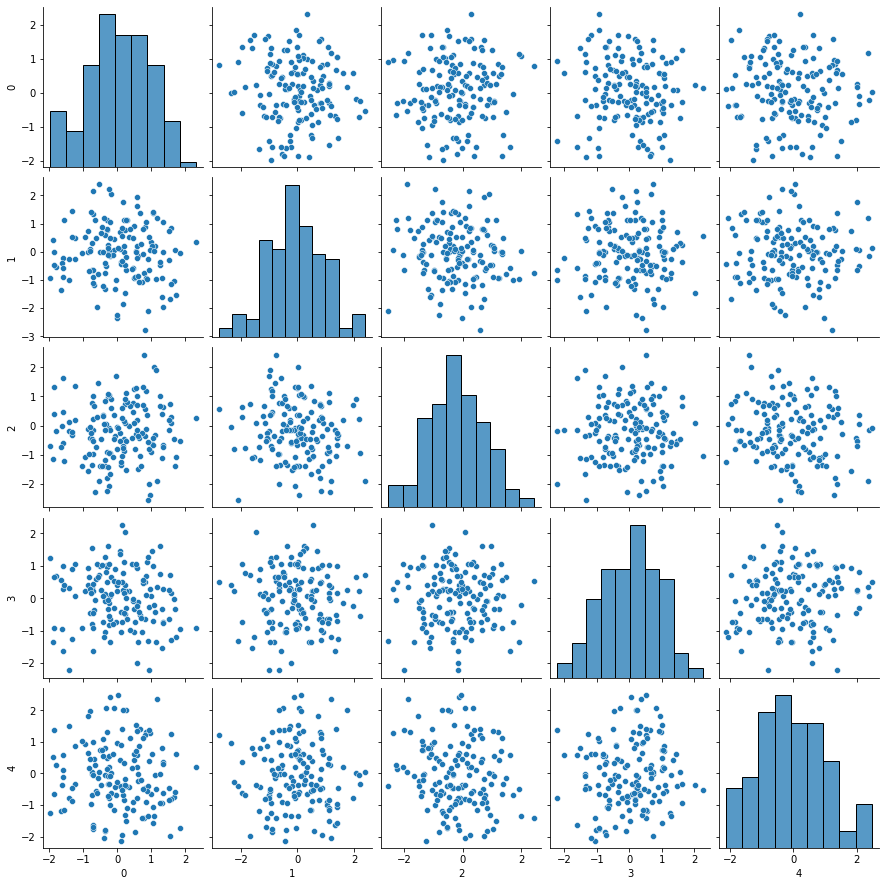

In [3]:
import seaborn as sns 
sns.pairplot(pd.DataFrame(np.random.randn(150, 5)))

# Loading and saving data

## Loading CSV

In [179]:
!unzip ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip

unzip:  cannot find or open ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip, ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip.zip or ../data/us_dot/traffic/T100_SEGMENT_ALL_CARRIER_2015.zip.ZIP.


In [180]:
df = pd.read_csv('914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv'

In [337]:
df.shape

(146938, 51)

## Saving to Excel

In [340]:
df.head(10000).to_excel('deps.xlsx')

## Saving to CSV

In [341]:
df.head(10000).to_csv('deps.csv')

## To Sql Database

In [349]:
import sqlite3

connection = sqlite3.connect('db.sql')
df.head(10000).to_sql('deps', connection, if_exists='replace')

/home/dani/anaconda3/envs/master2021/lib/python3.8/site-packages/pandas/core/generic.py:2602: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## To dictionary and to json

In [351]:
df.head().to_dict()

{'DEPARTURES_SCHEDULED': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DEPARTURES_PERFORMED': {0: 1.0, 1: 2.0, 2: 1.0, 3: 1.0, 4: 1.0},
 'PAYLOAD': {0: 528.0, 1: 3621.0, 2: 2169.0, 3: 1342.0, 4: 275.0},
 'SEATS': {0: 11.0, 1: 22.0, 2: 11.0, 3: 11.0, 4: 11.0},
 'PASSENGERS': {0: 2.0, 1: 2.0, 2: 2.0, 3: 1.0, 4: 1.0},
 'FREIGHT': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'MAIL': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'DISTANCE': {0: 3899.0, 1: 2589.0, 2: 1210.0, 3: 2316.0, 4: 1023.0},
 'RAMP_TO_RAMP': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'AIR_TIME': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0},
 'UNIQUE_CARRIER': {0: '10Q', 1: '10Q', 2: '10Q', 3: '10Q', 4: '10Q'},
 'AIRLINE_ID': {0: 21407.0, 1: 21407.0, 2: 21407.0, 3: 21407.0, 4: 21407.0},
 'UNIQUE_CARRIER_NAME': {0: 'Swiss Air Ambulance',
  1: 'Swiss Air Ambulance',
  2: 'Swiss Air Ambulance',
  3: 'Swiss Air Ambulance',
  4: 'Swiss Air Ambulance'},
 'UNIQUE_CARRIER_ENTITY': {0: '71084',
  1: '71084',
  2: '71084',
  3: '71084',
  4

In [352]:
df.head().to_json()

'{"DEPARTURES_SCHEDULED":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DEPARTURES_PERFORMED":{"0":1.0,"1":2.0,"2":1.0,"3":1.0,"4":1.0},"PAYLOAD":{"0":528.0,"1":3621.0,"2":2169.0,"3":1342.0,"4":275.0},"SEATS":{"0":11.0,"1":22.0,"2":11.0,"3":11.0,"4":11.0},"PASSENGERS":{"0":2.0,"1":2.0,"2":2.0,"3":1.0,"4":1.0},"FREIGHT":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"MAIL":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"DISTANCE":{"0":3899.0,"1":2589.0,"2":1210.0,"3":2316.0,"4":1023.0},"RAMP_TO_RAMP":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"AIR_TIME":{"0":0.0,"1":0.0,"2":0.0,"3":0.0,"4":0.0},"UNIQUE_CARRIER":{"0":"10Q","1":"10Q","2":"10Q","3":"10Q","4":"10Q"},"AIRLINE_ID":{"0":21407.0,"1":21407.0,"2":21407.0,"3":21407.0,"4":21407.0},"UNIQUE_CARRIER_NAME":{"0":"Swiss Air Ambulance","1":"Swiss Air Ambulance","2":"Swiss Air Ambulance","3":"Swiss Air Ambulance","4":"Swiss Air Ambulance"},"UNIQUE_CARRIER_ENTITY":{"0":"71084","1":"71084","2":"71084","3":"71084","4":"71084"},"REGION":{"0":"I","1":"I","2":

## Reading Excel

In [353]:
pd.read_excel('deps.xlsx')

,Unnamed: 0,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,0,0,1,528,11,2,0,0,3899,0,...,6,669,1,2015,1,1,8,L,IF,NaN
1,1,0,2,3621,22,2,0,0,2589,0,...,6,669,1,2015,1,1,6,L,IF,NaN
2,2,0,1,2169,11,2,0,0,1210,0,...,6,669,1,2015,1,1,3,L,DF,NaN
3,3,0,1,1342,11,1,0,0,2316,0,...,6,669,1,2015,1,1,5,L,IF,NaN
4,4,0,1,275,11,1,0,0,1023,0,...,6,669,1,2015,1,1,3,L,DF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,1,35000,150,29,0,0,552,115,...,6,617,1,2015,1,1,2,L,DU,NaN
9996,9996,0,1,35000,150,45,0,0,350,70,...,6,617,1,2015,1,1,1,L,DU,NaN
9997,9997,0,1,35000,150,30,0,0,609,118,...,6,617,1,2015,1,1,2,L,DU,NaN
9998,9998,0,1,35000,162,111,0,0,1571,265,...,6,617,1,2015,1,1,4,L,DU,NaN


In [358]:
accidents = pd.read_excel('01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', 
                          sheet_name='2010', 
                          skiprows=7,
                          skipfooter=1)
accidents

,DISTRITO_ACCIDENTE,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,Unnamed: 11
0,ARGANZUELA,403,48,103,75,7,26,15.0,2.0,5.0,6.0,690
1,BARAJAS,62,5,34,22,1,11,NaN,NaN,NaN,NaN,135
2,CARABANCHEL,357,35,133,114,7,22,14.0,6.0,7.0,1.0,696
3,CENTRO,546,43,142,169,2,60,14.0,9.0,13.0,9.0,1007
4,CHAMARTIN,460,67,128,85,11,77,16.0,1.0,8.0,5.0,858
5,CHAMBERI,361,34,86,103,1,66,14.0,5.0,2.0,4.0,676
6,CIUDAD LINEAL,404,79,120,90,8,39,12.0,6.0,7.0,2.0,767
7,FUENCARRAL-EL PARDO,294,49,165,72,10,26,9.0,6.0,3.0,2.0,636
8,HORTALEZA,183,15,68,44,4,11,8.0,4.0,3.0,3.0,343
9,LATINA,273,37,93,94,6,24,4.0,7.0,10.0,4.0,552


#### Exercise

Consolidate the excel into one DataFrame: you will need to create a 'YEAR' column. Think how you can iterate through all the DataFrames. Think also where you can take the value of 'YEAR' from.

In [184]:
pd.ExcelFile?

In [190]:
type(pd.read_excel('../01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', sheet_name=None))

dict

In [187]:
for sheet, df in pd.read_excel('../01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls', sheet_name=None).items():
    print(sheet)

2009
2010
2011
2012
2013
2014
2015
2016


## Reading mysql database

In [362]:
cxn = sqlite3.connect('db.sql')
pd.read_sql('SELECT * FROM deps WHERE "DEPARTURES_PERFORMED" > 5', cxn)

,index,DEPARTURES_SCHEDULED,DEPARTURES_PERFORMED,PAYLOAD,SEATS,PASSENGERS,FREIGHT,MAIL,DISTANCE,RAMP_TO_RAMP,...,AIRCRAFT_GROUP,AIRCRAFT_TYPE,AIRCRAFT_CONFIG,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 50
0,14,0.0,9.0,562962.0,2548.0,2154.0,0.0,0.0,2188.0,0.0,...,6,696,1,2015,1,1,5,F,IF,None
1,15,0.0,18.0,1237995.0,5159.0,4905.0,0.0,0.0,1873.0,0.0,...,6,696,1,2015,1,1,4,F,IF,None
2,16,0.0,9.0,565173.0,2595.0,2156.0,0.0,0.0,2188.0,0.0,...,6,696,1,2015,1,1,5,F,IF,None
3,17,0.0,18.0,1237436.0,5109.0,4855.0,0.0,0.0,1873.0,0.0,...,6,696,1,2015,1,1,4,F,IF,None
4,19,0.0,9.0,910800.0,2835.0,1666.0,2882.0,0.0,4879.0,0.0,...,6,696,1,2015,1,1,10,F,IF,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,9919,0.0,6.0,129000.0,0.0,0.0,0.0,0.0,194.0,304.0,...,6,635,2,2015,1,1,1,P,IU,None
3182,9953,0.0,9.0,315000.0,1458.0,1012.0,0.0,0.0,1396.0,2009.0,...,6,617,1,2015,1,1,3,L,IU,None
3183,9982,0.0,9.0,315000.0,1458.0,1005.0,0.0,0.0,1396.0,2265.0,...,6,617,1,2015,1,1,3,L,IU,None
3184,9983,0.0,8.0,280000.0,1284.0,1030.0,0.0,0.0,1667.0,1923.0,...,6,617,1,2015,1,1,4,L,IU,None


# Additional References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)

[What is SciPy?](https://www.scipy.org/)

[How can SciPy be fast if it is written in an interpreted language like Python?](https://www.scipy.org/scipylib/faq.html#how-can-scipy-be-fast-if-it-is-written-in-an-interpreted-language-like-python)

[What is the difference between NumPy and SciPy?](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)

[Linear Algebra for AI](https://github.com/fastai/fastai/blob/master/tutorials/linalg_pytorch.ipynb)